# Distribuição Normal e Teoremas Limites

Nessa aula, vamos estudar a distribuição normal. Vamos inicialmente gerar dados a partir dessa distribuição.

Text(0, 0.5, 'Probability Density')

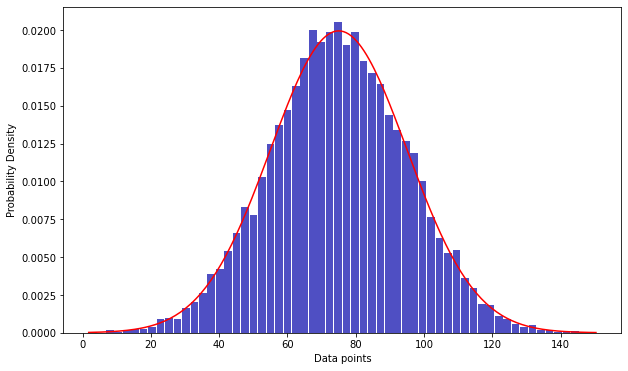

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
 
# funcao que mostra a distribuicao teorica
def normal_dist(x , mean , sigma):
    prob_density = (1/(sigma*(math.sqrt(2*np.pi))))*np.exp(-0.5*((x-mean)/sigma)**2)
    return prob_density
 
#Calculate mean and Standard deviation.
mean = 75
sigma = 20
n = 10000
X = np.random.normal(mean, sigma, n)
plt.figure(figsize=(10,6))
Pk, bins, ignored = plt.hist(X, bins='auto', density=True, color='#0504aa',alpha=0.7, 
                                rwidth=0.9)

# define os valores de x
x = np.linspace(np.min(X),np.max(X),200)
# Distribuicao teorica
pdf = normal_dist(x,mean,sigma)

#Plotting the Results
plt.plot(x,pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

Podemos resolver alguns exemplos para verificar algumas aplicações dessa distribuição.

**Exemplo**: Se $X \sim  \mathcal{N}(\mu=165,\,\sigma^{2}=9)$, calcule $P(X<162)$.

In [2]:
import scipy.stats as st

media = 165
dp = 3
z = (162-media)/dp
print('Z:', z)
print(st.norm.cdf(z))

Z: -1.0
0.15865525393145707


**Exemplo**: Se $X \sim  \mathcal{N}(\mu=10,\,\sigma^{2}=4)$, calcule $P(X>13)$.

In [3]:
import scipy.stats as st

media = 10
dp = 2
z = (13-media)/dp
print('Z:', z)
print(1-st.norm.cdf(z))

Z: 1.5
0.06680720126885809


**Exemplo:** O peso médio de 500 estudantes do sexo masculino de uma determinada universidade é 75,5 Kg e o desvio padrão é 7,5 Kg. Admitindo que os pesos são normalmente distribuídos, determine a percentagem de estudantes que pesam:

a) entre 60 e 77,5 Kg. 
$$
P(60 \leq X \leq 77,5) = P\left(\frac{60-\mu}{\sigma} \leq \frac{X-\mu}{\sigma} \leq \frac{77,5-\mu}{\sigma}\right)=P\left(\frac{60-\mu}{\sigma} \leq Z \leq \frac{77,5-\mu}{\sigma}\right) = 
$$
$$
= P\left(Z \leq \frac{77,5-\mu}{\sigma}\right)-P\left( Z \leq \frac{60-\mu}{\sigma}\right)
$$

In [4]:
import scipy.stats as st
media = 75.5
dp = 7.5
z1 = (60-media)/dp
z2 = (77.5-media)/dp
print('Probabilidade teórica:',st.norm.cdf(z2)-st.norm.cdf(z1))

Probabilidade teórica: 0.5857543024471563


Simulando:

In [5]:
media = 75.5
dp = 7.5
n = 100
X = np.random.normal(media, dp, n)
m = 0
for x in X:
    if x > 60 and x < 77.5:
        m = m + 1
print('Probabilidade (simulação):', m/n)

Probabilidade (simulação): 0.59


b) mais do que 92,5 Kg. 
$$
P(X \geq 92,5) = P\left( \frac{X-\mu}{\sigma}\geq \frac{92,5-\mu}{\sigma}\right) = P\left( Z \geq \frac{92,5-\mu}{\sigma}\right) = 1 - P\left( Z < \frac{92,5-\mu}{\sigma}\right)
$$

In [6]:
z1 = (92.5-media)/dp
p = 1-st.norm.cdf(z1)
print('Probabilidade teórica:',p)

Probabilidade teórica: 0.011705298080558313


In [7]:
media = 75.5
dp = 7.5
n = 100
X = np.random.normal(media, dp, n)
m = 0
for x in X:
    if x > 92.5:
        m = m + 1
print('Probabilidade (simulação):', m/n)

Probabilidade (simulação): 0.02


**Exemplo:** Uma máquina de bebidas está regulada de modo a servir uma média de 150ml por copo. Se a quantidade servida por copo seguir uma distribuição normal com desvio padrão de 20 ml, determine a percentagem de copos que conterão mais de 175ml de bebida.

$$
P(X \geq 175) = P\left( \frac{X-\mu}{\sigma}\geq \frac{175-\mu}{\sigma}\right) = P\left( Z \geq \frac{175-\mu}{\sigma}\right) = 1 - P\left( Z < \frac{175-\mu}{\sigma}\right)
$$

In [8]:
media = 150
dp = 20
z = (175-media)/dp
print((1-st.norm.cdf(z))*100,'%')

10.564977366685536 %


## Teorema Central do Limite

A distribuição Normal aparece no Teorema Central do Limite.

**Teorema:** Seja uma amostra aleatória $(X_1,X_2,\ldots,X_n)$ retiradas de uma população com média $\mu$ e variância $\sigma$. A distribuição amostral de $\bar{X}$ aproxima-se, para n grande, de uma distribuição normal com média $E[\bar{X}]=\mu$ e variância $\sigma^2/n$.<br>

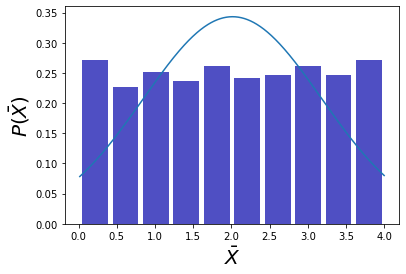

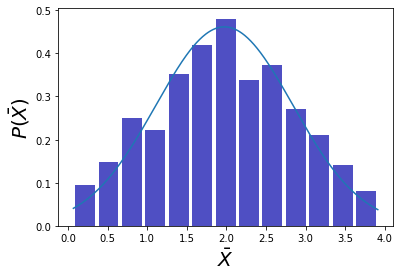

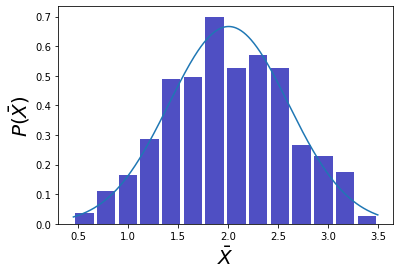

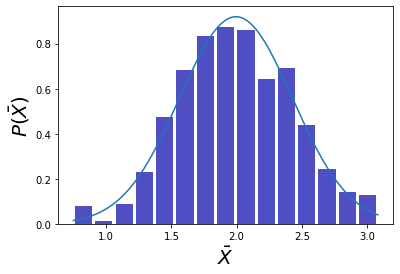

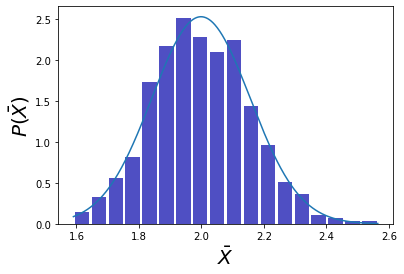

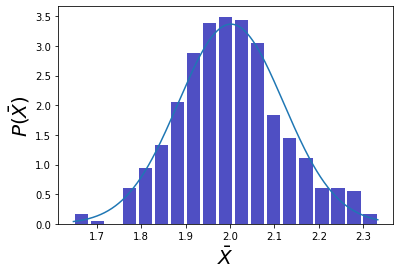

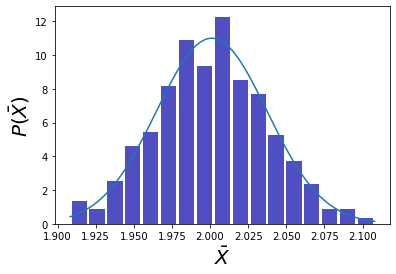

In [9]:
import scipy.stats as stats

vS =  [1, 2 , 4 , 8, 50, 100, 1000]# sample size
S = 500 # number of samples
mu = 2

for n in vS: #sample size
    vmean = []
    for s in range(0,S): # select s samples of size n
        X = np.random.uniform(0,2*mu, n) # X is generated from a uniform probability distribution
        #X = np.random.exponential(mu, n) # X is generated from an exponential probability distribution
        vmean.append(np.mean(X))
    plt.figure(figsize=(6,4))
    plt.hist(x=vmean, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85, density=True)
    plt.xlabel(r'$\bar{X}$', fontsize=20)
    plt.ylabel(r'$P(\bar{X})$', fontsize=20)

    # Plot the theoretical curve
    #xt = plt.xticks()[0]  
    xmin, xmax = min(vmean), max(vmean)  
    lnspc = np.linspace(xmin, xmax, len(vmean))
    m, s = stats.norm.fit(vmean) # get mean and standard deviation  
    pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
    plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.show(True)

Vemos que independentemente da distribuição de $X$, a distribuição da média amostral sempre segue uma normal quando o número de amostras é grande.

Vamos considerar alguns exemplos.

**Exemplo:** Seja a variável aleatória com distribuição de probabilidade: P(X=3)=0,4; P(X=6)=0,3; P(X=8)=0,3. Uma amostra com 40 observações é sorteada. Qual é a probabilidade de que a média amostral ser maior do que 5?

In [10]:
def esperanca(X,P):
    E = 0
    for i in range(0, len(X)):
        E = E + X[i]*P[i]
    return E
    
def variancia(X,P):
    E = 0; E2 = 0
    for i in range(0, len(X)):
        E = E + X[i]*P[i]
        E2 = E2 + (X[i]**2)*P[i]
    V = E2-E**2
    return V
    
X = [3,6,8]
P = [0.4,0.3,0.3]
E = esperanca(X,P)
V = variancia(X,P)
print("Esperança:", E, "Variância:",V)

Esperança: 5.4 Variância: 4.439999999999991


Valor teórico:

In [11]:
import scipy.stats as st
import numpy as np

mu = E
sigma = np.sqrt(V)
n = 40
x = 5
Z = (x - mu)/(sigma/np.sqrt(n))
pt = 1-st.norm.cdf(Z)
print('Probabilidade:',pt)

Probabilidade: 0.885046886863795


Vamos sortear várias amostras de tamanho n=40 e verificar qual a probabilidade da média dessa amostra ser maior do que 5.

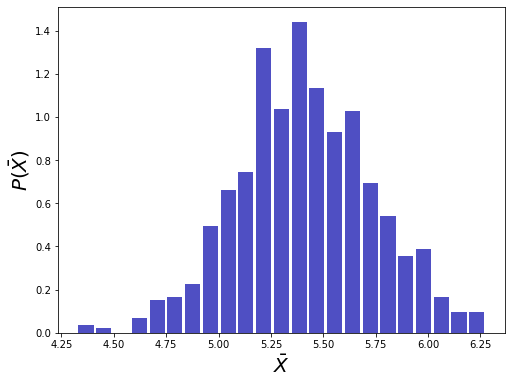

Media das amostras: 5.408875 Media da população: 5.4


In [12]:
import matplotlib.pyplot as plt

n = 40
ns = 1000 #numero de simulacoes
vx = [] # armazena a media amostral
for s in range(0,ns):
    A = np.random.choice(X, n, p=P)
    vx.append(np.mean(A))
plt.figure(figsize=(8,6))
plt.hist(x=vx, bins='auto',color='#0504aa', alpha=0.7, rwidth=0.85, density = True)
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)    
print("Media das amostras:", np.mean(vx), "Media da população:", E)

A probabilidade de ser maior do que 5:

In [13]:
nmaior = 0
for i in range(0, len(vx)):
    if(vx[i] > 5):
        nmaior = nmaior + 1
nmaior = nmaior/len(vx)
print("Probabilidade de ser maior do que 5:", nmaior, "Valor teórico:", pt)

Probabilidade de ser maior do que 5: 0.901 Valor teórico: 0.885046886863795


## Lei dos grandes números

Outro teorema fundamental e a lei dos grandes números. Basicamente, a lei forte dos grandes números é enunciada da seguinte forma:

Sejam $X_1,X_2,\ldots, X_n$ um conjunto de variáveis aleatórias independentes e identicamente distribuídas. Seja $E[X_i]=\mu$. Então, com probabilidade um, podemos afirmar:
$$
\lim_{n \rightarrow \infty} \frac{X_1+X_2+\ldots+X_n}{n} \rightarrow \mu
$$


Podemos verificar essa lei através de simulações.

Vamos considerar o lançamento de uma moeda. Seja $p$ a chance de sair cara. Então $E[X)i]=p$, sendo $i$ o i-ésimo lançamento da moeda e $X=1$ se for cara ou $X=0$, se sair coroa. Conforme notamos a seguir, quando aumentamos o número de simulações, a média de $n$ simulações converge para a probabilidade $p$.

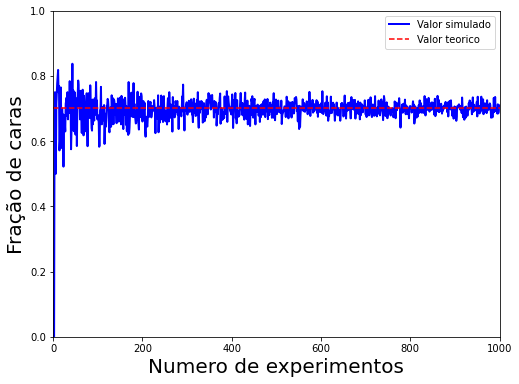

In [14]:
import numpy as np
import matplotlib.pyplot as plt
 
p = 0.7
vp = [] # lista que armazena a fração de ocorrências em função do número de simulações nsim
vsim = [] # armazena o número de simulações
Nmax = 1000 # numero maximo de simulacoes
for nsim in np.arange(1,Nmax,1):
    nhead = 0 # numero de caras
    for i in range(1,nsim):
        if(np.random.uniform() < p):
            nhead = nhead + 1        
    vp.append(nhead/nsim)
    vsim.append(nsim)

plt.figure(figsize=(8,6))
plt.plot(vsim, vp, linestyle='-', color="blue", linewidth=2,label = 'Valor simulado')
plt.axhline(y=p, color='r', linestyle='--', label = 'Valor teorico')
plt.ylabel("Fração de caras", fontsize=20)
plt.xlabel("Numero de experimentos", fontsize=20)
plt.xlim([0.0, Nmax])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show(True) 

### Exercícios de fixação

1 - Se $X \sim  \mathcal{N}(\mu=100,\,\sigma^{2}=10)$, calcule $P(X<95)$.

2 - O peso médio de n estudantes do sexo masculino de uma determinada universidade é 75,5 Kg e o desvio padrão é 7,5 Kg. Admitindo que os pesos são normalmente distribuídos, determine a percentagem de estudantes que pesam entre 60 e 80 Kg. Considere n=100, 200 e 500. Compare os resultados.

3 - Obtenha os valor simulador (como feito anteriormente), para o problema a seguir. Compare a simulação com o valor teórico.

Uma máquina de bebidas está regulada de modo a servir uma média de 150ml por copo. Se a quantidade servida por copo seguir uma distribuição normal com desvio padrão de 20 ml, determine a percentagem de copos que conterão mais de 175ml de bebida.

4 - Verifique a lei dos grandes números para diferentes valores de $p$ no exemplo anterior.